# This notebook gives a demo about the evaluation metrics used for Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#balanced data set

In [2]:
X, y = load_iris(return_X_y=True)
print(np.unique(y, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


In [25]:
#Unbalanced data set

In [3]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)
print(np.unique(y, return_counts=True))

(array([0, 1]), array([212, 357], dtype=int64))


since there were only 150 instances and this is just a demo about the eval metrics we are not splitting the data into train and test

## Accuracy

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X,y)
y_preds = log_reg.predict(X)
print('Accuracy of the trained model is', round(accuracy_score(y, y_preds),2))

Accuracy of the trained model is 0.96


In [13]:
#Let's tweak the Breast cancer data set to make it more imbalanced and then see what accuracy doesn't reveal 
X, y = datasets.load_breast_cancer(return_X_y = True)
malignant_X = X[y==0]
malignant_y = y[y==0]
benign_X = X[y==1]
benign_y = y[y==1]
new_X = np.r_[benign_X, malignant_X[:50]]
new_y = np.r_[benign_y, malignant_y[:50]]
print(np.unique(new_y, return_counts=True))

(array([0, 1]), array([ 50, 357], dtype=int64))


In [14]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(new_X, new_y)
preds = dummy.predict(new_X)
print(np.unique(preds, return_counts = True))
print('Accuracy of the Dummy Classifier is', round(accuracy_score(new_y, preds),2))

(array([1]), array([407], dtype=int64))
Accuracy of the Dummy Classifier is 0.88


## Conufsion Matrix

In [16]:
#for a binry classifier
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
X, y = load_breast_cancer(return_X_y = True)
log_reg = LogisticRegression()
log_reg.fit(X,y)
preds = log_reg.predict(X)
print(confusion_matrix (y, preds))
print('Accuracy score of the model is', round(accuracy_score(preds, y),2))

[[198  14]
 [  9 348]]
Accuracy score of the model is 0.96


In [19]:
#confusion matrix of a classifier having more than 2 classes
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
X, y = load_iris(return_X_y = True)
log_reg = LogisticRegression()
log_reg.fit(X,y)
preds = log_reg.predict(X)
conf_matrix = confusion_matrix (y, preds)
print(conf_matrix)
print('Accuracy score of the model is', round(accuracy_score(preds, y),2))

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]
Accuracy score of the model is 0.96


## viewing the confusion matrix using a heat map

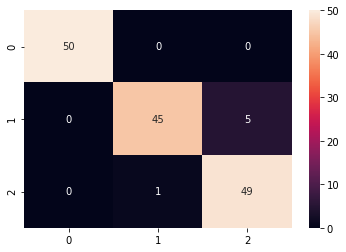

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(y, preds),annot=True)

## Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.90      0.94        50
           2       0.91      0.98      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

